In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('default') 

In [2]:
df_eventos = pd.read_csv('events.csv', low_memory =False)
df_eventos.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visitantes de Trocafone



In [ ]:
residencia_eventos = df_eventos[['event','city','region','country']]
residencia_eventos.head()

Se puede observar que estos datos se registran cada vez que el sitio es visitado, entonces nos quedaremos solamente con aquellos eventos.

In [ ]:
residencia_visitantes=residencia_eventos.loc[(residencia_eventos['event']=='visited site'),['city','region','country']]

In [ ]:
residencia_visitantes['country'].value_counts().head()

In [ ]:
residencia_visitantes['Live in Brazil'] = (residencia_visitantes['country']=='Brazil')
visitantes_en_brasil = residencia_visitantes['Live in Brazil'].value_counts()
grafico_paises = visitantes_en_brasil.plot(kind='pie',autopct='%1.1f%%',figsize=(8,8),fontsize=0,colors=['green','yellow'],explode=(0.1, 0))
grafico_paises.set_title('Visitantes de la página en Brasil',fontsize = 22)
grafico_paises.set_ylabel('')
leyenda=plt.legend(['Brasil','Resto del mundo'],fontsize=12,title='País',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Se puede observar en el gráfico superior que por una mayoría abrumadora, los visitantes del sitio web son residentes de Brasil, dejando una mínima parte para el resto del mundo. Dentro de estos últimos los países que se destacan son Estados Unidos y Argentina, en ese orden.

In [6]:
df_eventos['vive en Brasil'] = df_eventos['country']=='Brazil'
personas_en_Brasil = df_eventos[['person','event','city','region']]


In [7]:
personas_en_Brasil_copia_original =df_eventos[['person','vive en Brasil']]
personas_en_Brasil_copia = personas_en_Brasil_copia_original.loc[personas_en_Brasil_copia_original['vive en Brasil']==True]
personas_en_Brasil_copia.head()

,person,vive en Brasil
1,0004b0a2,True
5,0006a21a,True
9,000a54b2,True
16,000a54b2,True
45,00184bf9,True


In [8]:
personas_en_Brasil = pd.merge(personas_en_Brasil,personas_en_Brasil_copia, how='inner', on='person')
personas_en_Brasil.head()

,person,event,city,region,vive en Brasil
0,0004b0a2,ad campaign hit,NaN,NaN,True
1,0004b0a2,visited site,Camaragibe,Pernambuco,True
2,0004b0a2,viewed product,NaN,NaN,True
3,0004b0a2,checkout,NaN,NaN,True
4,0006a21a,viewed product,NaN,NaN,True


In [9]:
lugares_eventos=personas_en_Brasil_copia_original.groupby('person').agg({'vive en Brasil':'sum'})
lugares_eventos['vive en Brasil'] = lugares_eventos['vive en Brasil']>0
lugares_eventos.head(10)

,vive en Brasil
person,
0004b0a2,True
0006a21a,True
000a54b2,True
00184bf9,True
0019c395,True
001bb7eb,True
001f1653,True
00204059,False
0020f73c,False


In [7]:
cant_eventos_Brasil = personas_en_Brasil['event'].value_counts()

Text(0.5,0,'Cantidad(log)')

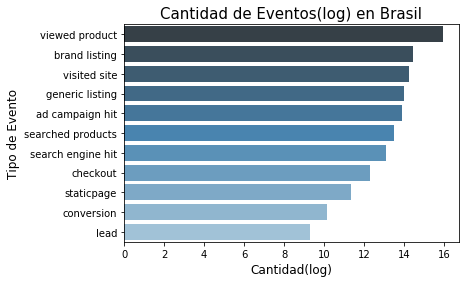

In [8]:
grafico_eventos_pais =sns.barplot(np.log(cant_eventos_Brasil.values),cant_eventos_Brasil.index,palette ='Blues_d')
grafico_eventos_pais.set_title("Cantidad de Eventos(log) en Brasil",fontsize=15)
grafico_eventos_pais.set_ylabel("Tipo de Evento",fontsize=12)
grafico_eventos_pais.set_xlabel("Cantidad(log)",fontsize=12)

In [9]:
#Intentar hacer el mismo gráfico de arriba para aquellos ids que están fuera de Brasil, y realizar un Stacked bar plot para
#Comparar ambas cosas

In [10]:
df_eventos= pd.merge(df_eventos,lugares_eventos,how='inner',on='person')
df_eventos.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,vive en Brasil_x,vive en Brasil_y
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,True,True
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,True,True
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,True,True


In [6]:
del df_eventos['vive en Brasil_x']
df_eventos.rename(columns={'vive en Brasil_y':'vive en Brasil'})
df_eventos.head()

KeyError: 'vive en Brasil_x'

In [13]:
df_eventos['vive en Brasil_y'].value_counts()

True     987604
False     23684
Name: vive en Brasil_y, dtype: int64

Text(0,0.5,'Cantidad')

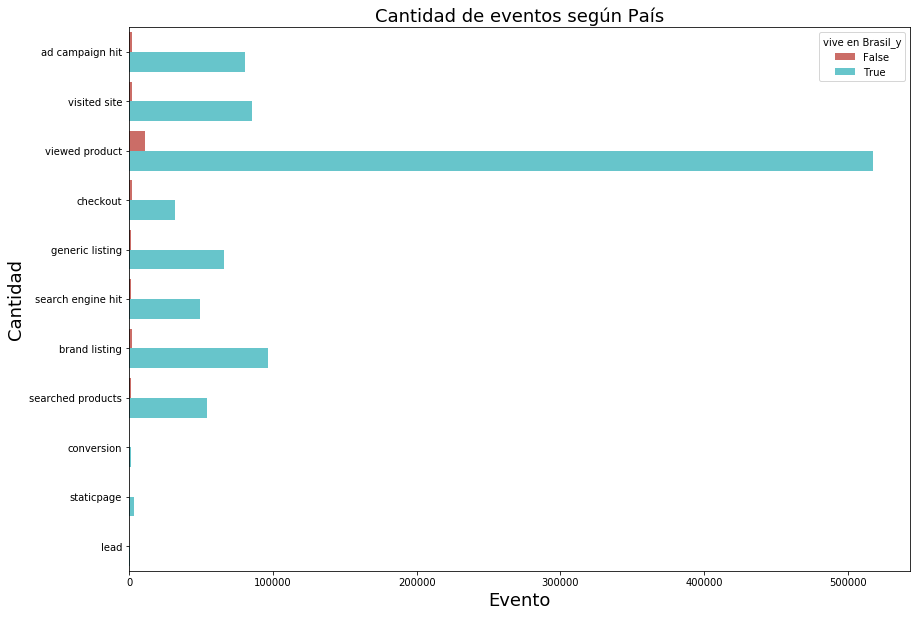

In [12]:

fig , ax=plt.subplots(figsize=(14,10))
g=sns.countplot(y="event",ax=ax, hue="vive en Brasil_y", data=df_eventos, palette="hls")
g.set_title("Cantidad de eventos según País", fontsize=18)
g.set_xlabel("Evento", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)


Se puede observar en absolutamente todas las categorias, que la mayoría de los eventos son de origen brasilero. Y que las vistas de un producto tienen una cantidad de ocurrencias mucho mayor que a cualquier otro tipo de evento tanto para aquellos generados en Brasil como para los que se encuentran en el resto del mundo. Obvi

## Regiones de Brasil

In [3]:
visitas_por_region = df_eventos.loc[(df_eventos['country']=='Brazil'),'region']
visitas_por_region.value_counts().head(10)

Sao Paulo            24996
Unknown              12378
Minas Gerais          7755
Rio de Janeiro        6913
Bahia                 5737
Pernambuco            2962
Ceara                 2829
Parana                2602
Rio Grande do Sul     2576
Federal District      1739
Name: region, dtype: int64

Muchos de las visitas dadas en Brasil, no tienen información sobre de que región provienen, por las cuales las trataremos como una "región" más porque se trata de un gran porcentaje de los datos. 

Text(0.5,0,'Cantidad')

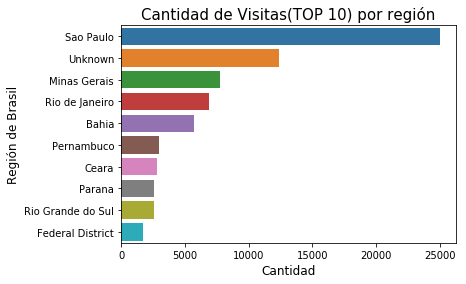

In [17]:
grafico_visitas_regiones = sns.barplot(visitas_por_region.value_counts().head(10).values,visitas_por_region.value_counts().head(10).index)
sns.color_palette("colorblind", n_colors=10)
grafico_visitas_regiones.set_title("Cantidad de Visitas(TOP 10) por región",fontsize=15)
grafico_visitas_regiones.set_ylabel("Región de Brasil",fontsize=12)
grafico_visitas_regiones.set_xlabel("Cantidad",fontsize=12)

# Lead por Productos

In [4]:
lead_events = df_eventos.loc[df_eventos['event']=='lead',['person','model','timestamp']]
lead_events.head()

,person,model,timestamp
3248,01139919,Samsung Galaxy On 7,2018-04-17 22:11:19
6636,01bca043,iPhone 6 Plus,2018-04-07 11:37:11
7036,01db2fe6,Samsung Galaxy J5,2018-02-12 17:23:30
13041,03767f8e,iPhone 6,2018-03-08 12:39:30
14203,03bdcd81,Samsung Galaxy S7 Edge,2018-01-08 14:04:07


In [5]:
lead_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 3248 to 1003073
Data columns (total 3 columns):
person       448 non-null object
model        448 non-null object
timestamp    448 non-null object
dtypes: object(3)
memory usage: 14.0+ KB


Para los eventos de lead, los usuarios se registran en la página para poder recibir una notificación para saber en que momento vuelve a haber disponibilidad del producto que ellos desean. Entonces solamente nos quedaremos en con la información que nos puede resultar útil.

In [6]:
lead_per_model = lead_events['model'].value_counts()
lead_per_model.head(10)

iPhone 6 Plus                 35
iPhone 6S Plus                31
Samsung Galaxy J7 Prime       26
iPhone 6S                     21
iPhone 8                      20
Motorola Moto G4 Plus         20
Motorola Moto G5 Plus         15
Samsung Galaxy On 7           15
Samsung Galaxy A9 Pro 2016    15
iPhone 6                      12
Name: model, dtype: int64

In [7]:
lead_per_model.sum()

448

Text(0.5,0,'Cantidad de Leads')

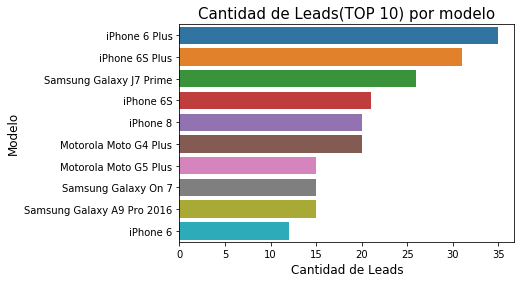

In [8]:
grafico_lead_model = sns.barplot(lead_per_model.head(10).values,lead_per_model.head(10).index)
sns.color_palette("Paired", n_colors=10)
grafico_lead_model.set_title("Cantidad de Leads(TOP 10) por modelo",fontsize=15)
grafico_lead_model.set_ylabel("Modelo",fontsize=12)
grafico_lead_model.set_xlabel("Cantidad de Leads",fontsize=12)

Como podemos observar, los principales productos por los cuales los usuario se registran son los Iphone, sus modelos son 5 de los 10 que más generan el evento lead. Luego, los Samsung Galaxy y Motorola completan este top 10. Los celulares de Alta Gama son aquellos que aparecen más frecuentemente en este tipo de eventos.

# Usuarios con lead y Coversion

In [9]:
person_conversion = df_eventos.loc[(df_eventos['event']=='conversion'),['person','sku','model','timestamp']]
person_conversion.head()

,person,sku,model,timestamp
220,00204059,3084.0,Motorola Moto X2,2018-03-20 17:46:12
2282,00c13dee,6650.0,Samsung Galaxy Core Plus Duos TV,2018-04-26 22:28:53
2547,00fdbb4b,3348.0,Samsung Galaxy S6 Flat,2018-06-10 14:37:50
4245,0146a9df,2694.0,iPhone 5s,2018-03-16 13:50:25
6985,01db2fe6,6357.0,Samsung Galaxy J5,2018-02-09 22:07:07


In [10]:
person_lead_conversion = pd.merge(person_conversion,lead_events,on="person",how="inner")
person_lead_conversion.columns =['person','sku','modelo_comprado','timestamp_comprado','modelo_lead','timestamp_lead']
person_lead_conversion.head(10)

,person,sku,modelo_comprado,timestamp_comprado,modelo_lead,timestamp_lead
0,01db2fe6,6357.0,Samsung Galaxy J5,2018-02-09 22:07:07,Samsung Galaxy J5,2018-02-12 17:23:30
1,03bdcd81,3301.0,Samsung Galaxy S6 Edge,2018-01-09 16:47:50,Samsung Galaxy S7 Edge,2018-01-08 14:04:07
2,07cd981f,297.0,iPhone 5s,2018-04-21 12:44:29,iPhone 6S,2018-05-16 00:42:33
3,19b38ba2,11862.0,Sony Xperia M4 Aqua,2018-03-30 08:24:58,Sony Xperia M4 Aqua,2018-03-30 05:33:49
4,19b38ba2,11862.0,Sony Xperia M4 Aqua,2018-03-30 08:24:58,LG G4 H815P,2018-04-11 11:54:51
5,19b38ba2,6399.0,Samsung Galaxy J7,2018-03-30 16:01:02,Sony Xperia M4 Aqua,2018-03-30 05:33:49
6,19b38ba2,6399.0,Samsung Galaxy J7,2018-03-30 16:01:02,LG G4 H815P,2018-04-11 11:54:51
7,19b38ba2,6791.0,Samsung Galaxy S5 New Edition Duos,2018-03-30 19:15:28,Sony Xperia M4 Aqua,2018-03-30 05:33:49
8,19b38ba2,6791.0,Samsung Galaxy S5 New Edition Duos,2018-03-30 19:15:28,LG G4 H815P,2018-04-11 11:54:51
9,19b38ba2,12716.0,Sony Xperia M4 Aqua Dual,2018-03-31 04:33:57,Sony Xperia M4 Aqua,2018-03-30 05:33:49


In [12]:
person_buy_lead = person_lead_conversion.loc[(person_lead_conversion['modelo_comprado']==person_lead_conversion['modelo_lead'])&(person_lead_conversion['timestamp_lead']<person_lead_conversion['timestamp_comprado']),:]
person_buy_lead.drop_duplicates('sku')

,person,sku,modelo_comprado,timestamp_comprado,modelo_lead,timestamp_lead
3,19b38ba2,11862.0,Sony Xperia M4 Aqua,2018-03-30 08:24:58,Sony Xperia M4 Aqua,2018-03-30 05:33:49
14,19b38ba2,7575.0,LG G4 H815P,2018-04-11 15:20:25,LG G4 H815P,2018-04-11 11:54:51
36,1db2e967,7337.0,Samsung Galaxy J1 2016,2018-05-07 18:19:38,Samsung Galaxy J1 2016,2018-05-05 11:27:54
37,1de395ee,10155.0,iPhone 7 Plus,2018-01-15 17:25:39,iPhone 7 Plus,2018-01-15 12:57:53
52,3c7691f1,8609.0,Motorola Moto X Force,2018-05-04 23:19:11,Motorola Moto X Force,2018-05-04 17:48:04
59,410252e7,5280.0,Samsung Galaxy Gran Prime 3G Duos,2018-04-12 19:21:07,Samsung Galaxy Gran Prime 3G Duos,2018-04-11 19:34:36
73,52a4edd3,7617.0,Motorola Moto G3 4G,2018-04-17 17:39:01,Motorola Moto G3 4G,2018-04-17 00:45:31
78,53a86c44,10351.0,Motorola Moto G4 Plus,2018-01-30 20:21:33,Motorola Moto G4 Plus,2018-01-30 10:09:43
91,61531761,12241,Samsung Galaxy A9 Pro 2016,2018-05-22 13:57:53,Samsung Galaxy A9 Pro 2016,2018-05-19 01:16:20
93,6e68b45e,12452.0,Motorola Moto Z,2018-05-14 22:23:56,Motorola Moto Z,2018-03-26 19:48:15


In [13]:
person_buy_lead['sku'].count()

48

En total, tenemos 48 compras donde previamente se realizaron leads para conocer cuando va a haber nuevamente disponibilidad del producto que el cliente quiera adquirir. Por lo tanto, a partir de los 448 leads que se generaron se obtuvieron finalmente un 10,7% de compras de ese producto que se pidió disponibilidad.

In [20]:
buy_post_lead = person_buy_lead['modelo_comprado'].value_counts().head(10)

Text(0.5,0,'Cantidad de Compras post Lead')

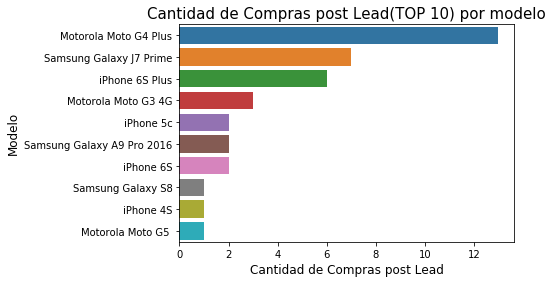

In [22]:
grafico_compras_post_lead = sns.barplot(buy_post_lead.head(10).values,buy_post_lead.head(10).index)
sns.color_palette("Paired", n_colors=10)
grafico_compras_post_lead.set_title("Cantidad de Compras post Lead(TOP 10) por modelo",fontsize=15)
grafico_compras_post_lead.set_ylabel("Modelo",fontsize=12)
grafico_compras_post_lead.set_xlabel("Cantidad de Compras post Lead",fontsize=12)

Comparando el gráfico "Cantidad de Leads(TOP 10) por modelo" con el recién visto, podemos concluir que no tiene tanta fuerza la realción registarse por un celular y terminar comprandolo, como se podía esperar. Por ejemplo, el Iphone tenía una gran ocurrencia respecto a los lead, mientras que acá tiene muy pocas compras. A diferencia del Motorola Moto G4 Plus que tuvo un gran porcentaje de compras respecto a los leads.